In [ ]:
import random
import pandas as pd
import os

def calculate_n(temp, humidity):
    n = (3.2 - (0.0032 * (temp - 23)) - (0.022 * (humidity - 50)) + (0.0000015 * temp * temp) - (0.00003 * humidity * humidity) + (0.00001 * temp * humidity) )
    return round(n, 2)

# Generate random temperature and humidity values for 10000 iterations
iterations = 10000
temps = [round(random.uniform(0, 50), 2) for _ in range(iterations)]
humidities = [round(random.uniform(0, 99), 2) for _ in range(iterations)]

# Calculate n for each iteration
ns = [calculate_n(temps[i], humidities[i]) for i in range(iterations)]

# Create a Pandas dataframe to store the data
data = {'Temperature': temps, 'Humidity': humidities, 'n': ns}
df = pd.DataFrame(data)

# Save the dataframe to a CSV file
df.to_csv('n_values.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset from the CSV file
data = pd.read_csv('n_values.csv')




In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Temperature', 'Humidity']], data[['n']], test_size=0.2, random_state=42)



In [ ]:
# Build a  Complex CNN model
model = Sequential()
model.add(Dense(2, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)



Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 62.3147
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 2.3648
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 2.2267
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 2.0836
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 1.9226
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 1.7402
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 1.5252
Epoch 8/20
250/250 [==============================] - 1s 2ms/step - loss: 1.1744
Epoch 9/20
250/250 [==============================] - 1s 2ms/step - loss: 0.7550
Epoch 10/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4040
Epoch 11/20
250/250 [==============================] - 1s 2ms/step - loss: 0.1897
Epoch 12/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0808
Epoch 13/20
250/250 [===

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


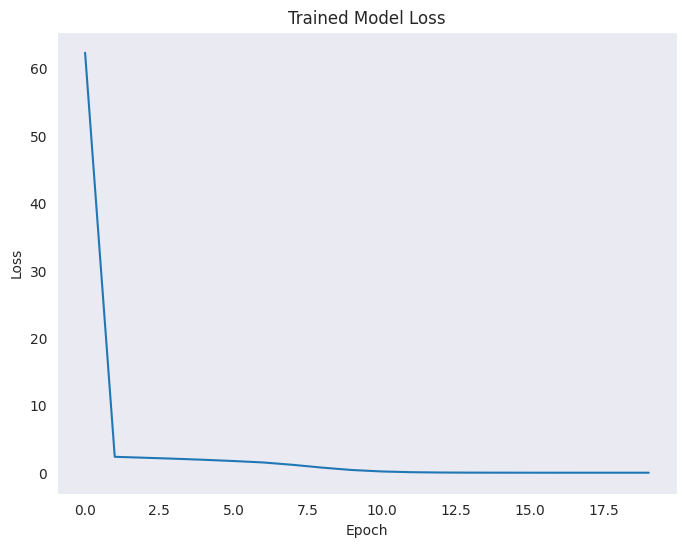

In [ ]:

# Plot the loss graph
sns.set_style("dark")
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Trained Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print('Mean Squared Error on test set:', loss)

63/63 [==============================] - 0s 1ms/step - loss: 0.0032
Mean Squared Error on test set: 0.0031835762783885


In [ ]:
# Predict the close price using the test set
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Print the mean absolute error
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  0.030587319321632386


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

R-squared:  0.9936862752926126


In [ ]:
# Predict the path loss component for a given temperature and humidity
temp_str = input('Enter the temperature (in Celsius): ')
humidity_str = input('Enter the humidity (in percentage): ')
temperature = float(temp_str)
humidity = float(humidity_str)

path_loss = model.predict(np.array([[temperature, humidity]]))
print('Predicted path loss exponent:', path_loss[0][0])


Enter the temperature (in Celsius): 23.5
Enter the humidity (in percentage): 89.3
1/1 [==============================] - 0s 59ms/step
Predicted path loss exponent: 2.137402


In [ ]:
model.save('my_model.h5')


In [ ]:
def weights_to_cpp(model, filename="weights_and_biases.txt"):
    model.summary()
    weights = []
    biases = []
    for l in range(len(model.layers)):
        W, B = model.layers[l].get_weights()
        weights.append(W.flatten())
        biases.append(B.flatten())

    z = []
    b = []
    for i in np.array(weights):
        for l in i:
            z.append(l)
    for i in np.array(biases):
        for l in i:
            b.append(l)
    with open(filename, "w") as f:
      f.write("weights: {")
      for i in range(len(z)):
        if (i < len(z)-1):
          f.write(str(z[i])+", ")
        else:
          f.write(str(z[i]))
      f.write("}\n\n")

      f.write("biases: {")
      for i in range(len(b)):
        if (i < len(b)-1):
          f.write(str(b[i])+", ")
        else:
          f.write(str(b[i]))
      f.write("}\n\n")

      arch = []

      arch.append(model.layers[0].input_shape[1])
      for i in range(1, len(model.layers)):
          arch.append(model.layers[i].input_shape[1])
      arch.append(model.layers[len(model.layers)-1].output_shape[1])
      f.write("Architecture: {")
      for i in range(len(arch)):
          if (i < len(arch)-1):
              f.write(str(arch[i])+", ")
          else:
              f.write(str(arch[i]))
      f.write("}")
      print("Architecture (alpha):", arch)
      print("Layers: ", len(arch))
    print("Weights: ", z)
    print("Biases: ", b)


In [ ]:
weights_to_cpp(model, filename="weights_and_biases.txt")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 2)                 6         
                                                                 
 dense_18 (Dense)            (None, 16)                48        
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Architecture (alpha): [2, 2, 16, 1]
Layers:  4
Weights:  [0.62121207, 0.85981596, 0.17756486, 0.006290088, 0.07640654, 0.47845405, 0.56147414, -0.48516235, 0.4144334, 0.40409982, 0.07661235, -0.20421562, -0.08958274, 0.20663476, 0.15113525, 0.13982241, 0.1883488, -0.24636093, -0.44742104, 0.13170274, 0.17596598, -0.15364

<ipython-input-34-a5fe7af07bcc>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in np.array(weights):
<ipython-input-34-a5fe7af07bcc>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in np.array(biases):
